### 2-bit Magnitude Comparator
This notebook implements a 2-bit magnitude comparator with CBLB blocks.

#### Setting up the imports
External libraries + our own models and parameters

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import lib.models as models
from lib.parameters import *

#### Comparator model
Building our comparator model

In [29]:
def comparator_model(T, state, *params):
    # Read the state
    L_A0, L_B0, L_A1, L_B1, \
    L_I1, L_I2, L_I3, L_I4, L_I5, L_I6, L_I7, L_I8, L_I9, L_I10, L_I11, L_I12, L_I13, \
    A1, A0, B1, B0, \
    I1, I2, I3, I4, I5, I6, I7, I8, I9, I10, I11, I12, I13 = state
    # Read the params
    delta_L, gamma_A, gamma_B, n_a, n_b, theta_A, theta_B, eta_a, eta_b, omega_a, omega_b, m_a, m_b, delta_a, delta_b, rho_a, rho_b = params
    # Set params to use later
    params_or = delta_L, gamma_A, n_b, theta_A, eta_a, omega_a, m_a, delta_a, rho_a
    params_neg = delta_L, gamma_A, n_b, theta_A, eta_a, omega_a, m_a, delta_a, rho_a
    params_yes = gamma_A, n_b, theta_A, delta_a, rho_a

    # I1
    state_I1 = L_I1, A1, B1, I1
    dL_I1, dI1 = models.yes_not_or(state_I1, params_or)

    # I2
    state_I2 = L_I2, I2, I1
    dL_I2, dI2 = models.not_cell_wrapper(state_I2, params_neg)

    # I3
    state_I3 = L_I3, B1, A1, I3
    dL_I3, dI3 = models.yes_not_or(state_I3, params_or)

    # I4
    state_I4 = L_I4, I4, I3
    dL_I4, dI4 = models.not_cell_wrapper(state_I4, params_neg)

    # I5
    state_I5 = I2, I4, I5
    dI5 = models.yes_yes_or(state_I5, params_or)

    # I6
    state_I6 = L_I6, A0, B0, I6
    dL_I6, dI6 = models.yes_not_or(state_I6, params_or)

    # I7
    state_I7 = L_I7, B0, A0, I7
    dL_I7, dI7 = models.yes_not_or(state_I7, params_or)

    # I8
    state_I8 = I5, I6, I8
    dI8 = models.yes_yes_or(state_I8, params_or)

    # I9
    state_I9 = I5, I7, I9
    dI9 = models.yes_yes_or(state_I9, params_or)

    # I10
    state_I10 = L_I10, I2, I8, I10
    dL_I10, dI10 = models.yes_not_or(state_I10, params_or)

    # I11
    state_I11 = L_I11, I4, I9, I11
    dL_I11, dI11 = models.yes_not_or(state_I11, params_or)

    # I12
    state_I12 = I10, I11, I12
    dI12 = models.yes_yes_or(state_I12, params_or)

    # I13
    state_I13 = L_I13, I13, I12
    dL_I13, dI13 = models.not_cell_wrapper(state_I13, params_neg)

    # Set changes of unused variables to 0
    dL_A0, dL_B0, dL_A1, dL_B1, dL_I5, dL_I8, dL_I9, dL_I12, dA0, dB0, dA1, dB1 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

    # We are finished
    return np.array([dL_A0, dL_B0, dL_A1, dL_B1, \
                    dL_I1, dL_I2, dL_I3, dL_I4, dL_I5, dL_I6, dL_I7, dL_I8, dL_I9, dL_I10, dL_I11, dL_I12, dL_I13, \
                    dA0, dB0, dA1, dB1, \
                    dI1, dI2, dI3, dI4, dI5, dI6, dI7, dI8, dI9, dI10, dI11, dI12, dI13])

### Parameters
Setting the parameters

In [30]:
params = [delta_L,
          gamma_A,
          gamma_A,
          n_a,
          n_a,
          theta_A,
          theta_A,
          eta_a,
          eta_a,
          omega_a,
          omega_a,
          m_a,
          m_a,
          delta_a,
          delta_a,
          0,
          0]


### Testing the model
Running the simulation + Plotting the results

In [31]:
import seaborn as sns
sns.set_theme(style="darkgrid")

Iteration:  A0: 0  A1: 0 B0: 0  B1: 0
Iteration:  A0: 0  A1: 0 B0: 1  B1: 0
Iteration:  A0: 0  A1: 0 B0: 0  B1: 1
Iteration:  A0: 0  A1: 0 B0: 1  B1: 1
Iteration:  A0: 1  A1: 0 B0: 0  B1: 0
Iteration:  A0: 1  A1: 0 B0: 1  B1: 0
Iteration:  A0: 1  A1: 0 B0: 0  B1: 1
Iteration:  A0: 1  A1: 0 B0: 1  B1: 1
Iteration:  A0: 0  A1: 1 B0: 0  B1: 0
Iteration:  A0: 0  A1: 1 B0: 1  B1: 0
Iteration:  A0: 0  A1: 1 B0: 0  B1: 1
Iteration:  A0: 0  A1: 1 B0: 1  B1: 1
Iteration:  A0: 1  A1: 1 B0: 0  B1: 0
Iteration:  A0: 1  A1: 1 B0: 1  B1: 0
Iteration:  A0: 1  A1: 1 B0: 0  B1: 1
Iteration:  A0: 1  A1: 1 B0: 1  B1: 1


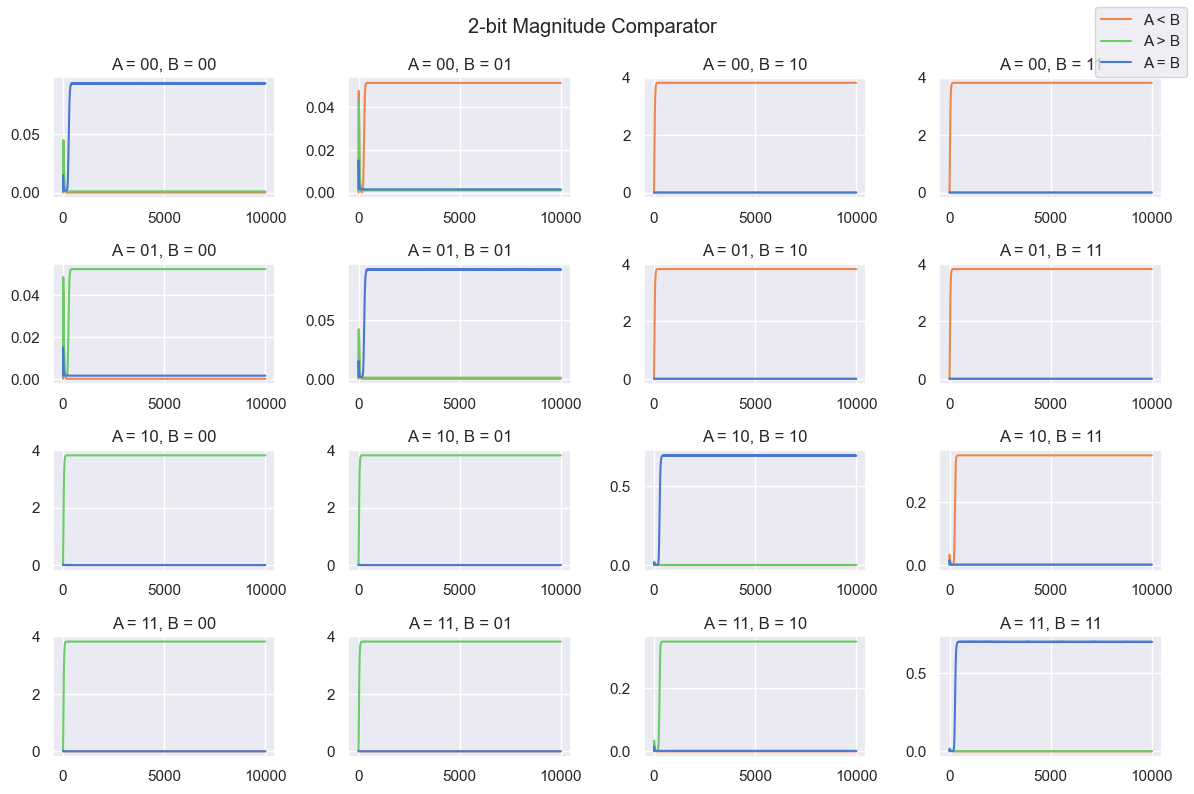

In [33]:
t_end = 10000
N = t_end * 10
T = np.linspace(0, t_end, N)

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 8))
iteration_a = -1
iteration_b = 0
for A1 in range(2):
    for A0 in range(2):
        iteration_a += 1
        iteration_b = 0
        for B1 in range(2):
            for B0 in range(2):
                print("Iteration: ", "A0:", A0, " A1:", A1, "B0:", B0, " B1:", B1)
                Y0 = np.zeros(34)
                Y0[17] = A1
                Y0[18] = A0
                Y0[19] = B1
                Y0[20] = B0
                sol = solve_ivp(comparator_model, [0, t_end], Y0, args=params, dense_output=True)
                z = sol.sol(T)
                # Value of A = B
                a_less_than_b = z.T[:, 30]
                a_more_than_b = z.T[:, 31]
                a_equal_b = z.T[:, 33]
                #ax.plot(T, value_a, color="red", label="A")
                #ax.plot(T, value_b, color="blue", label="B")
                # ax.set_ylim(bottom=-0.1, top=5)
                # ax[iteration_a, iteration_b].set_ylim(bottom=-0.05, top=5)
                if iteration_a == 0 and iteration_b == 0:
                    ax[iteration_a, iteration_b].plot(T, a_less_than_b, color=sns.color_palette("muted")[1], label="A < B")
                    ax[iteration_a, iteration_b].plot(T, a_more_than_b + 0.001, color=sns.color_palette("muted")[2], label="A > B")
                    ax[iteration_a, iteration_b].plot(T, a_equal_b + 0.0015, color=sns.color_palette("muted")[0], label="A = B")
                else:
                    ax[iteration_a, iteration_b].plot(T, a_less_than_b, color=sns.color_palette("muted")[1])
                    ax[iteration_a, iteration_b].plot(T, a_more_than_b + 0.001, color=sns.color_palette("muted")[2])
                    ax[iteration_a, iteration_b].plot(T, a_equal_b + 0.0015, color=sns.color_palette("muted")[0])
                # ax[iteration_a, iteration_b].legend()
                title = "A = {a1_bit}{a0_bit}, B = {b1_bit}{b0_bit}".format(a0_bit=A0, b0_bit=B0, a1_bit=A1, b1_bit=B1)
                ax[iteration_a, iteration_b].set_title(title)
                iteration_b += 1
filename = "slike/2_bit_magnitude_comparator/png/comparator_simulation"
fig.suptitle("2-bit Magnitude Comparator")
fig.tight_layout()
fig.legend()
fig.savefig(filename)
